# Generative Adverserial Network

## Generative Adverserial Network

- GAN은 생성자(Generator)와 구분자(Discriminator), 두 네트워크를 적대적으로 학습하는 비지도 학습 기반 생성모델임. GAN은 실제 데이터의 분포에 가까운 데이터를 생성하는 것이 목적임

    - $G$는 표준정규분포로 부터 생성된 $z$를 받아서 실제 데이터를 만들어내도록 학습됨. 
    - $D$는 실제 데이터와 $G$가 생성한 가짜 데이터를 구별하도록 학습됨. 

## Objective Function
- 두 명의 플레이어가 적대적으로 싸우면서 균형(nash equilibrium)을 찾아가도록 하는 방식

$$min_G max_D V(D, G) = E_{x \sim P_{data}(x)} [\text{log} D(x)] + E_{z \sim p_z(z)} [\text{log} \{ 1 - D(G(z)) \} ]$$

- Discriminator입장에서는 실제 데이터($x$)를 입력되면 높은 확률이 나오도록 접근($D(x)$를 높히고)하고, 가짜 데이터를 입력하면 확률이 낮아지도록($1 - D(G(z))$를 낮추는 방향) 학습함.

- Generator입장에서는 표준정규분포로 뽑은 노이즈 $z$를 받아서 생성된 가짜 데이터($G(z)$)를 $D$에 넣었을 때, 실제 데이터처럼 확률이 높게 나오도록 ($1 - D(G(z))$를 높히게)학습함. 

- 실제 학습을 진행할 때 두 네트워크를 동시에 학습시키지 않고 **따로따로 업데이트**를 하며, $D$를 학습시킬 때는 $G$를 고정한 상태에서, $G$를 학습시킬 때는 $D$를 고정시킨 상태로 진행함

- D를 학습하기 위한 목적함수는 아래와 같은데, $G$의 파라미터를 고정한 상태에서 실제 데이터 $m$개, $G$가 생성한 가짜 데이터 $m$개를 $D$에 넣고 $V$를 계산한 뒤, $D$에 대한 $V$의 그라디언트를 구하고 $V$를 높히는 방향으로 $D$의 파라미터를 업데이트 함

$$max_D V(D) = E_{x \sim P_{data}(x)} [\text{log} D(x)] + E_{z \sim p_z(z)} [\text{log}\  D(x)]$$

$$= \frac{1}{m} \sum_{i=1}^m \text{log} D(x^i) + \frac{1}{m} \sum_{i=1}^m \text{log} {1 - D(G(z^i))}$$

- $G$의 목적함수는 아래와 같은데, $D$의 파라미터를 고정한 상태에서 가짜 데이터 $m$개를 생성해 $V$를 계산한 뒤, $G$에 대한 $V$의 그래디언트를 구하고 $V$를 낮추는 방향으로 $G$의 파라미터를 업데이트 함

$$min_G V(G) = E_{z \sim p_z(z)} [\text{log} \{1 - D(G(z)) \} ]$$

$$= \frac{1}{m} \sum_{j=1}^m \text{log} \{1 - D(G(z^j)) \}$$

- 목적함수를 보면 expectation 안쪽이 $\text{log} (1 - x)$꼴임을 알 수 있는데, 이 경우 $x$가 0일 때 기울기가 작기 때문에 학습 초기 $G$의 파라미터를 업데이트하는데 문제점이 있을 수 있기 때문에 $G$의 목적함수를 아래와 같이 변경시켜서 가속화 시켜줌

$$min_G V(G) = E_{z \sim p_z{z}} [\text{log} \{ 1 - D(G(z))\} ] $$
$$= - E_{z \sim p_z(z)} [ \text{log} D(G(z))]$$


## 문제점과 극복방안
### mode collapse
- mode collapse는 학습시키는 모형이 실제 데이터의 분포를 모두 커버하지 못하고 다양성을 일어버리는 현상을 가르킴. 손실만을 줄이려고 학습을 하기 때문에 $G$가 전체 데이터 분포를 찾지 못하고, 한번에 하나의 mode에만 강하게 몰리게 되는 경우임. 

### Oscillation
- $G$와 $D$가 서로 진동하듯이 수렴하지 않는 문제도 mode collapse와 관련이 있음(오랫동안 훈련을 해도)

### mode collapse 해결방안
- 모델 전체 데이터 분포의 경계를 골고루 학습하고 기억할 수 있도록 하는 것이 핵심
    1. **feature matching** : 가짜 데이터와 실제 데이터 사이의 least square error를 목적함수에 추가함
    2. **mini-batch discrimination** : 미니배치별로 가짜 데이터와 실제 데이터 사이의 거리 합의 차이를 목적함수에 추가함
    3. **historical averaging** : 배치 단위로 파라미터를 업데이트하면 이전 학습은 잘 잊혀지기 때문에, 이전 학습 내용을 기억하는 방식으로 학습
    
### 힘의 균형
- $D$보다 $G$를 학습시키는 것이 조금더 어려움. $G$가 학습이 잘 안되어서 둘 사이의 힘의 균형이 깨지는 경우 GAN학습이 더 이상 진전되기가 어려울 수 있음. GAN 연구 초기에는 $G$를 k번 업데이트 시키고, $D$를 한번 업데이트시키거나, 목적함수 비율을 조절하는 등의 밸런스를 맞추기 위해 다양한 방식을 시도하였지만 좋은 대안이 되지 못했음. 그렇지만 최근엔 LSGAN, WGAN, F-GAN, EBGAN 등 손실함수를 바꿔서 문제를 해결한 연구가 여럿 제안되었음

### 평가
- GAN은 데이터 생성이 목적이기 때문에 정량적인 평가가 어려움. 
    1. **정성평가** : 눈 discriminator를 사용함
    2. **학습된 분류기를 이용** : 기존 신경망을 활용해서 label이 있는 데이터셋을 학습심. 동일한 데이터로 GAN을 학습한 후 $G$를 이용해서 새로운 데이터를 생성하고 미리 학습시켜둔 분류기 모델에 넣어 분류를 실행함. 이 때 
        - a) 생성된 새로운 데이터가 한 범주에 높은 확률로 분류되거나 
        - b) 전체적으로 다양한 범주의 데이터가 생성되었다면 GAN의 성능을 높였다고 평가할 수 있음
    3. **inception score** : $G$가 생성한 데이터의 다양성(개성)을 측정하는 지표도 클 수록 좋음

## 1. Import Libs

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torchvision.utils import make_grid

from collections import OrderedDict
import os
import matplotlib.pyplot as plt
%matplotlib inline

USE_CUDA = torch.cuda.is_available()

## 2. Setting Hyperparameters

In [2]:
num_epoch = 40
batch_size = 100
lr = 0.0002
z_dim = 64

result_dir = './save_results/MNIST/GAN'
model_dir = './save_models/MNIST'

if not os.path.exists(result_dir):
    os.mkdir(result_dir)
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

## 3. Load dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# MNIST
mnist_train = dset.MNIST(
    root='./data/',
    train=True,
    transform=transform,
    download=True
)

# DataLoader
train_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

## 4. Build Model
- Generator
- Discriminator

In [4]:
D = nn.Sequential(
    nn.Linear(784, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

G = nn.Sequential(
    nn.Linear(z_dim, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 256),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 784),
    nn.Tanh()
)

if USE_CUDA:
    D = D.cuda()
    G = G.cuda()    

### utils

In [5]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

## 5. Loss function & Optimizers
## Objective Function
- 두 명의 플레이어가 적대적으로 싸우면서 균형(nash equilibrium)을 찾아가도록 하는 방식

$$min_G max_D V(D, G) = E_{x \sim P_{data}(x)} [\text{log} D(x)] + E_{z \sim p_z(z)} [\text{log} \{ 1 - D(G(z)) \} ]$$

- Discriminator입장에서는 실제 데이터($x$)를 입력되면 높은 확률이 나오도록 접근($D(x)$를 높히고)하고, 가짜 데이터를 입력하면 확률이 낮아지도록($1 - D(G(z))$를 낮추는 방향) 학습함.

- Generator입장에서는 표준정규분포로 뽑은 노이즈 $z$를 받아서 생성된 가짜 데이터($G(z)$)를 $D$에 넣었을 때, 실제 데이터처럼 확률이 높게 나오도록 ($1 - D(G(z))$를 높히게)학습함. 

- 실제 학습을 진행할 때 두 네트워크를 동시에 학습시키지 않고 **따로따로 업데이트**를 하며, $D$를 학습시킬 때는 $G$를 고정한 상태에서, $G$를 학습시킬 때는 $D$를 고정시킨 상태로 진행함

- D를 학습하기 위한 목적함수는 아래와 같은데, $G$의 파라미터를 고정한 상태에서 실제 데이터 $m$개, $G$가 생성한 가짜 데이터 $m$개를 $D$에 넣고 $V$를 계산한 뒤, $D$에 대한 $V$의 그라디언트를 구하고 $V$를 높히는 방향으로 $D$의 파라미터를 업데이트 함

$$max_D V(D) = E_{x \sim P_{data}(x)} [\text{log} D(x)] + E_{z \sim p_z(z)} [\text{log}\  D(x)]$$

$$= \frac{1}{m} \sum_{i=1}^m \text{log} D(x^i) + \frac{1}{m} \sum_{i=1}^m \text{log} {1 - D(G(z^i))}$$

- $G$의 목적함수는 아래와 같은데, $D$의 파라미터를 고정한 상태에서 가짜 데이터 $m$개를 생성해 $V$를 계산한 뒤, $G$에 대한 $V$의 그래디언트를 구하고 $V$를 낮추는 방향으로 $G$의 파라미터를 업데이트 함

$$min_G V(G) = E_{z \sim p_z(z)} [\text{log} \{1 - D(G(z)) \} ]$$

$$= \frac{1}{m} \sum_{j=1}^m \text{log} \{1 - D(G(z^j)) \}$$

- 목적함수를 보면 expectation 안쪽이 $\text{log} (1 - x)$꼴임을 알 수 있는데, 이 경우 $x$가 0일 때 기울기가 작기 때문에 학습 초기 $G$의 파라미터를 업데이트하는데 문제점이 있을 수 있기 때문에 $G$의 목적함수를 아래와 같이 변경시켜서 가속화 시켜줌

$$min_G V(G) = E_{z \sim p_z{z}} [\text{log} \{ 1 - D(G(z))\} ] $$
$$= - E_{z \sim p_z(z)} [ \text{log} D(G(z))]$$

### Loss function & Optims
$$L_D^{GAN} = E[log(D(x))] + E[log(1 - D(G(z))]$$

$$L_G^{GAN} = E[log(D(G(z)))]$$


In [6]:
criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=lr)
g_optimizer = optim.Adam(G.parameters(), lr=lr)

In [7]:
try:
    G.load_state_dict(torch.load(model_dir + '/gan_generator.pkl'))
    D.load_state_dict(torch.load(model_dir + '/gan_discriminator.pkl'))
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass


--------model not restored--------



## 6. Train

### Training
- 이상적인 경우, 즉 $G$가 매우 학습이 잘 되었으면 $G$가 표준정규분에서 ㅃ뽀은 노이즈 $z$를 받아서 생성한 데이터와 실제 데이터가 일치할 것임.

$$D^* = max_D V(D)$$

$$= E_{x \sim P_{data}(x)}[ \text{log} D(x)] + E_{z \sim p_z(z)}[\text{log} \{ 1 - D(G(z)) \} ]$$

$$= E_{x \sim P_{data}(x)}[ \text{log} D(x)] + E_{z \sim p_z(z)}[\text{log} \{ 1 - D(x) \} ]$$

$$=\int_x P_{data}(x) \text{log}\  D(x)dx + \int_x p_g(x) \text{log}\  \{ 1 - D(x) \}dx  $$

$$=\int_x P_{data}(x) \text{log}\  D(x) + p_g(x) \text{log}\  \{ 1 - D(x) \}dx  $$

- 위의 식이 최대화하는 지점은 $D_(x)$로 미분한 값이 0이 되는 자점임. 식을 $D(x)$로 정리하면 아래와 같음. 아래 식에 원래 가정인 $p_g(x) = p_{data}(x)$를 대입해서 풀면 최적의 구분자는 1/2로 수렴됨

$$D^* = \frac{P_{data}(x)}{P_{data}(x) + p_g (x)}$$

- $D$는 데이터 $x$가 주어졌을 떄 실제 데이터일 확률을 의미함. 이를 베이즈룰을 이용해서 정리하면 최적의 $D$는 사전확률 $p(y=1)$와 $p(y=0)$이 1/2로 서로 같을 때 도출됨

$$p(y=1 | x) = \frac{p(x,y = 1)}{p(x)}$$

$$=\frac{p(x, y = 1) / p(y = 1)}{\{ p(x,y=1) + p(x,y=0) / p(y=1) \}}$$

$$=\frac{p(x|y = 1)}{p(x|y = 1) + p(x|y=0)}$$

$$=\frac{p(x|y = 1) 1/2}{p(x|y = 1) 1/2 + p(x|y=0) 1/2}$$

$$=\frac{p(x|y = 1) p(y=1)}{p(x|y = 1) p(y) + p(x|y=0) p(y=0)}$$

- GAN의 목적함수를 최적의 구분자 $D$를 전제하고 식을 정리하면 아래와 같음. 최적의 $D$가 전제된 상황이라면 GAN의 목적함수를 최적화하는 과정은 $p_{data}$와 $p_g$사이의 **Jensen-Shannon Divergence**를 최소화하는 것과 같음. 잰슨-새넌 다이버전스는 두 확률 분포 간 차이를 재는 함수의 일종인데, **데이터의 분포와 $G$가 생성하는 분포 사이의 차이를 줄인다**라고 해석할 수 있음

수식 제외

In [8]:
# Start training
total_batch = len(train_loader.dataset)//batch_size
for epoch in range(num_epoch + 1):
    for i, (images, _) in enumerate(train_loader):
        # Build mini-batch dataset
        images = images.view(batch_size, -1)

        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size,1)
        fake_labels = torch.zeros(batch_size,1)

        if USE_CUDA:
            images = images.cuda()
            real_labels = real_labels.cuda()
            fake_labels = fake_labels.cuda()
        
        #============= Train the discriminator =============#
        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images)
        
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = torch.randn(batch_size, z_dim)
        
        if USE_CUDA:
            z = z.cuda()
        
        fake_images = G(z).detach()
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Backprop + Optimize
        d_loss = d_loss_real + d_loss_fake
        D.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        #=============== Train the generator ===============#
        # Compute loss with fake images
        z = torch.randn(batch_size, z_dim)
        
        if USE_CUDA:
            z = z.cuda()
        
        fake_images = G(z)
        outputs = D(fake_images)

        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels)

        # Backprop + Optimize
        D.zero_grad()
        G.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, '
                  'g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
                  %(epoch, num_epoch, i+1, total_batch, d_loss.item(), g_loss.item(),
                    real_score.data.mean(), fake_score.data.mean()))

    # Save real images
    if (epoch+1) == 1:
        images = images.view(images.size(0), 1, 28, 28)
        save_image(denorm(images.data), result_dir +'/real_images.png')

    # Save sampled images
    fake_images = fake_images.view(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images.data), result_dir +'/fake_images-%d.png' %(epoch+1))

# Save the trained parameters
torch.save(G.state_dict(), model_dir + '/gan_generator.pkl')
torch.save(D.state_dict(), model_dir + '/gan_discriminator.pkl')

Epoch [0/40], Step[300/600], d_loss: 0.9347, g_loss: 2.7364, D(x): 0.75, D(G(z)): 0.35
Epoch [0/40], Step[600/600], d_loss: 0.1582, g_loss: 3.3430, D(x): 0.94, D(G(z)): 0.08
Epoch [1/40], Step[300/600], d_loss: 0.1262, g_loss: 3.9672, D(x): 0.96, D(G(z)): 0.06
Epoch [1/40], Step[600/600], d_loss: 1.1902, g_loss: 2.6309, D(x): 0.65, D(G(z)): 0.27
Epoch [2/40], Step[300/600], d_loss: 0.1824, g_loss: 3.6387, D(x): 0.94, D(G(z)): 0.07
Epoch [2/40], Step[600/600], d_loss: 0.5084, g_loss: 2.8584, D(x): 0.81, D(G(z)): 0.15
Epoch [3/40], Step[300/600], d_loss: 0.7514, g_loss: 2.3000, D(x): 0.77, D(G(z)): 0.21
Epoch [3/40], Step[600/600], d_loss: 0.3563, g_loss: 2.8511, D(x): 0.89, D(G(z)): 0.17
Epoch [4/40], Step[300/600], d_loss: 1.8430, g_loss: 1.1127, D(x): 0.66, D(G(z)): 0.65
Epoch [4/40], Step[600/600], d_loss: 0.6290, g_loss: 2.0752, D(x): 0.74, D(G(z)): 0.20
Epoch [5/40], Step[300/600], d_loss: 0.7007, g_loss: 1.7903, D(x): 0.77, D(G(z)): 0.27
Epoch [5/40], Step[600/600], d_loss: 0.2495

## 7. Check Train Image

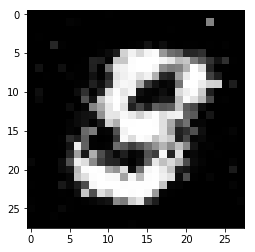

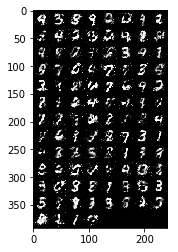

In [9]:
z = torch.randn(batch_size, z_dim)

if USE_CUDA:
    z = z.cuda()

fake_images = G(z)
plt.imshow(denorm(fake_images[2].cpu().view(28,28).data).numpy(), cmap='gray')
plt.show()

plt.imshow(make_grid(denorm(fake_images.data.view(batch_size,1,28,28))).cpu().permute(1,2,0).numpy())
plt.show()

## 8. Display Generated Data

In [10]:
import imageio

images = []
for epoch in range(num_epoch + 1):
    try:
        img_name = result_dir +'/fake_images-%d.png' %(epoch+1)
        images.append(imageio.imread(img_name))
    except:
        pass

imageio.mimsave(result_dir + '/fake_images_total.gif', images, fps=4)

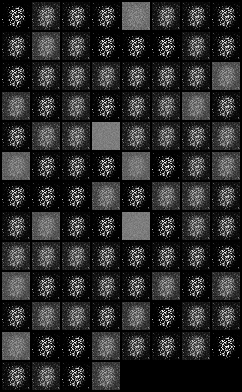

In [11]:
from IPython.display import Image

with open(result_dir + '/fake_images_total.gif','rb') as f:
    display(Image(data=f.read(), format='gif'))